#高松の気温の時系列推移

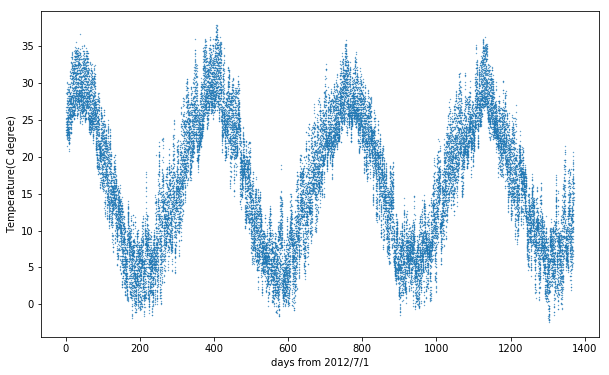

In [1]:
# coding: utf-8
import pandas as pd
import matplotlib.pyplot as plt

# 気象データを読み込み
tmp = pd.read_csv(
    u'47891_takamatsu.csv',
    parse_dates={'date_hour': ["日時"]},
    index_col='date_hour',
    na_values='×'
)

del tmp["時"]  # 「時」の列は使わないので、削除

# 列の名前に日本語が入っているとよくないので、これから使う列の名前のみ英語に変更
columns = {
    "降水量(mm)": "rain",
    "気温(℃)": "temperature",
    "日照時間(h)": "sunhour",
    "湿度(％)": "humid",
}
tmp.rename(columns=columns, inplace=True)

# 画像のサイズを設定する
plt.figure(figsize=(10, 6))

# ヒストグラム生成
delta = tmp.index - pd.to_datetime('2012/07/01 00:00:00')
tmp['time'] = delta.days + delta.seconds / 3600.0 / 24.0

plt.scatter(tmp['time'], tmp['temperature'], s=0.1)
plt.xlabel('days from 2012/7/1')
plt.ylabel('Temperature(C degree)')

# グラフ保存
plt.show()
